# 6 номер

In [1]:
!pip install gekko
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from math import cos

      fun: -128.8204444832676
 hess_inv: <51x51 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.26292593e+02, -4.61568561e-03, -2.61479727e-04,  2.13162821e-04,
       -1.48162371e-02,  1.11072040e-02, -1.30029321e-02,  4.36273240e-03,
       -1.25055521e-04,  2.27373675e-03, -9.77138370e-03,  1.71525016e-02,
       -1.91249683e-02,  1.94233962e-02, -6.10214101e-03,  5.49391643e-03,
        3.47313289e-03, -7.69375674e-03,  8.26503310e-03, -1.74111392e-02,
        1.72661885e-02, -1.41824330e-02,  1.27215571e-02, -6.80131507e-03,
        6.03108674e-03, -1.74054549e-02,  1.68824954e-02, -2.13390194e-02,
        2.19415597e-02, -3.10933501e-03,  6.99742486e-03,  3.03828074e-03,
       -9.86517534e-03, -5.55928636e-03, -9.32516286e-03, -6.16751095e-03,
        7.72786279e-03, -7.65680852e-03,  1.44865453e-02, -1.59019464e-02,
        2.98712166e-03, -1.13772103e-02, -3.02406988e-03,  7.64828201e-03,
        1.36424205e-03,  1.02289732e-02,  4.63842298e-03, -9.10631570e-03,
 

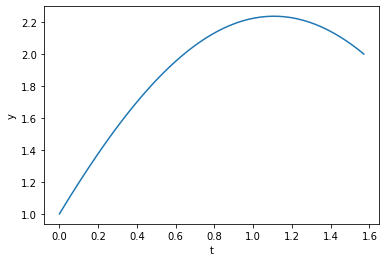

In [3]:
# Экстремаль была найдена
# Численным методом был найден минимум функционала, равный -128.82
# Задаём дискретное время
num_of_fractions = 51   # Количество делений на дискретной шкале времени
t = np.linspace(0, np.pi/2, num_of_fractions)     # Дискретная шкала времени, интеграл от нуля до pi/2
dt = t[1] - t[0]    # Рассчитываем шаг шкалы

# Задаём оптимизируемый функционал в дискретном времени
def f(y):
    return np.sum(((y[1:] - y[:-1]) / dt) ** 2 - y[1:] ** 2)

y0 = [0.2 for x in range(0, num_of_fractions)]     # Начальное значение y

# Задаем ограничения на y. У нас y(0)=1 и y(pi/2)=2
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (1-10e-6,1+ 10e-6), (2 - 10e-6, 2 + 10e-6)

ans = minimize(f, y0, method='l-bfgs-b', bounds=bounds)
print(ans)
plt.plot(t, ans.x)
plt.xlabel('t')
plt.ylabel('y')
plt.show()